#Explainable Fake News Detection using Machine learning, Deep learning, Bert and Transfer learning techniques.

# Importing required library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as ply 
from random import sample

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset preprocessing

### Inserting fake and real dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")

In [ ]:
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Inserting a column called "class" for fake and real news dataset as categories fake and true news. 

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23470,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21406,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-16-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-16-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
#Removing columns which are not required
df = df_merge.drop(["title", "subject","date"], axis = 1)

#### "title",  "subject" and "date" columns are not required for detecting the fake news

In [ ]:

df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
1073,Trump has repeatedly decried the gun violence ...,0
2306,Bill Maher literally called bullshit when a ...,0
15430,BRUSSELS (Reuters) - EU diplomats will start s...,1
21205,"MUZDALIFA, Saudi Arabia (Reuters) - Two millio...",1
7611,The Westboro Baptist Church doesn t leave much...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,Trump has repeatedly decried the gun violence ...,0
1,Bill Maher literally called bullshit when a ...,0
2,BRUSSELS (Reuters) - EU diplomats will start s...,1
3,"MUZDALIFA, Saudi Arabia (Reuters) - Two millio...",1
4,The Westboro Baptist Church doesn t leave much...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["class"]

# Splitting the dataset into training set and testing set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#Deep learning

Importing the necessary libraries

In [ ]:
import os
import sys
import numpy as np 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import LSTM,Embedding,Bidirectional
from keras.models import Model
from sklearn.metrics import roc_auc_score

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Dataset preprocessing

In [ ]:
y = df["class"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del df

In [ ]:
X[:1]

[['trump',
  'repeatedly',
  'decried',
  'gun',
  'violence',
  'plagues',
  'city',
  'chicago',
  'along',
  'republicans',
  'nra',
  'types',
  'claim',
  'chicago',
  'proof',
  'gun',
  'laws',
  'serve',
  'create',
  'bloodshed',
  'yet',
  'jeff',
  'sessions',
  'creating',
  'program',
  'give',
  'federal',
  'manpower',
  'cities',
  'help',
  'combat',
  'violent',
  'crime',
  'chicago',
  'one',
  'cities',
  'absence',
  'chicago',
  'another',
  'city',
  'huge',
  'violent',
  'crime',
  'problem',
  'baltimore',
  'bit',
  'surprising',
  'earlier',
  'year',
  'donald',
  'trump',
  'compared',
  'chicago',
  'afghanistan',
  'terms',
  'war',
  'zone',
  'threatened',
  'send',
  'feds',
  'chicago',
  'officials',
  'unable',
  'stop',
  'bloodshed',
  'also',
  'blasted',
  'chicago',
  'police',
  'department',
  'job',
  'maybe',
  'gonna',
  'politically',
  'correct',
  'maybe',
  'overly',
  'political',
  'correct',
  'maybe',
  'something',
  'going',
  

In [ ]:
y[:5]

array([0, 0, 1, 1, 0])

In [ ]:
y[-5:]

array([1, 1, 1, 0, 1])

In [ ]:
import gensim

Factorization - Word2Vec


Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.
Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

In [ ]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
#vocab size
len(w2v_model.wv.vocab)

#We have now represented each of 122238 words by a 100dim vector.

105665

In [ ]:
#see a sample vector for random word, lets say House
w2v_model["presidential"]

<ipython-input-45-84a387c1928a>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w2v_model["presidential"]


array([ 0.65658486, -0.76805556, -2.250073  , -0.7149206 , -1.0427002 ,
        4.1652966 ,  1.2138269 , -1.3117546 , -2.7552018 ,  3.1086597 ,
       -1.6102014 ,  0.6648787 ,  0.9977564 ,  1.7456292 ,  0.33210224,
       -0.9529556 , -0.95893186,  3.3086505 ,  0.381232  ,  0.9304006 ,
        1.2264653 , -1.5199406 , -2.2215085 , -0.73255384,  0.25998586,
        3.3127291 ,  0.66067535,  0.41515893, -2.664908  ,  2.2277088 ,
       -1.5205458 , -0.39405608,  0.5565524 ,  0.3124265 , -0.96432364,
        0.7030217 ,  0.8498351 ,  2.8225234 , -0.26421463, -1.8330228 ,
       -1.1727524 , -0.03912162,  0.39871716, -2.3340514 ,  1.875114  ,
       -4.4496264 ,  1.8102353 ,  2.1811752 ,  2.8009357 ,  1.8988316 ,
       -1.3572503 , -2.1857402 ,  0.1674265 , -0.65342057, -3.677961  ,
        0.5985589 , -1.5551395 , -0.63172185,  1.7955962 ,  1.0362132 ,
        0.22971311, -0.10653428, -0.09489581,  1.7009702 ,  0.6647219 ,
       -1.5615077 , -0.8127822 ,  0.2361538 , -1.5824299 ,  3.13

In [ ]:
w2v_model.wv.most_similar("trump")

[('elect', 0.698883056640625),
 ('obama', 0.5301699638366699),
 ('conway', 0.5229880213737488),
 ('actually', 0.517300009727478),
 ('saidhe', 0.5033538341522217),
 ('even', 0.49521690607070923),
 ('bush', 0.4911985397338867),
 ('president', 0.48652029037475586),
 ('cruz', 0.4743097424507141),
 ('giuliani', 0.46513664722442627)]

In [ ]:
w2v_model.wv.most_similar("america")

[('nation', 0.7230456471443176),
 ('country', 0.6633973717689514),
 ('intelligenti', 0.6384783387184143),
 ('american', 0.6000804901123047),
 ('us', 0.541098952293396),
 ('world', 0.5372588038444519),
 ('planet', 0.515775203704834),
 ('candidatus', 0.5115458965301514),
 ('truly', 0.5083870887756348),
 ('americans', 0.4994204044342041)]

In [ ]:
w2v_model.wv.most_similar("hillary")

[('alexbwall', 0.6119823455810547),
 ('baldarsaro', 0.5789068341255188),
 ('darlakay', 0.5767374038696289),
 ('mrs', 0.5755818486213684),
 ('chelsea', 0.5718822479248047),
 ('killery', 0.5712617039680481),
 ('grifters', 0.5673571825027466),
 ('darlaforestal', 0.5649481415748596),
 ('warts', 0.5464217662811279),
 ('sanders', 0.5436569452285767)]

In [ ]:
w2v_model.wv.most_similar("twitter")

[('activeview', 0.7427077293395996),
 ('unfollowed', 0.7192857265472412),
 ('instagram', 0.6954503655433655),
 ('thereligionofpeace', 0.669765055179596),
 ('carlyfiorinaforvicepresident', 0.6579801440238953),
 ('bcaecllaekl', 0.6536579132080078),
 ('yournewswire', 0.6481225490570068),
 ('joeforamerica', 0.6464507579803467),
 ('googlesyndication', 0.6431655883789062),
 ('libertyvan', 0.6410467028617859)]

In [ ]:
#Feeding US Presidents
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])
#First was Bush

[('bush', 0.6039436459541321),
 ('elect', 0.5381293296813965),
 ('nmlwydsepo', 0.5294344425201416),
 ('crooked', 0.5038387775421143),
 ('hillary', 0.5026760101318359),
 ('sanders', 0.47836819291114807),
 ('incoming', 0.47273683547973633),
 ('actually', 0.46689146757125854),
 ('fact', 0.4624220132827759),
 ('romney', 0.4594525992870331)]

These Vectors will be passed to LSTM/GRU instead of words. 1D-CNN can further be used to extract features from the vectors.

Keras has implementation called "Embedding Layer" which would create word embeddings(vectors). Since we did that with gensim's word2vec, we will load these vectors into embedding layer and make the layer non-trainable.

We cannot pass string words to embedding layer, thus need some way to represent each words by numbers.

Tokenizer can represent each word by number

In [ ]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it to lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[1, 840, 8375, 315, 288, 24435, 110, 1026, 405, 59]

In [ ]:
#Lets check few word to numerical reprsentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
also -> 8
new -> 9
reuters -> 10


Notice it starts with 1

We can pass numerical representation of words into neural network.


We can use Many-To-One (Sequence-To-Word) Model of RNN, as we have many words in news as input and one output ie Probability of being Real.
For Many-To-One model, lets use a fixed size input

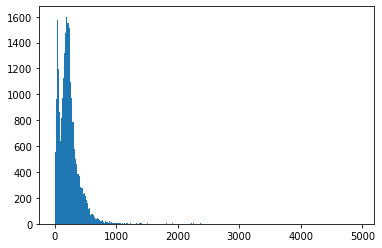

In [ ]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in X], bins=500)
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :)

In [ ]:
len(y)

44898

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])
## Out of 44k news, 43k have less than 700 words

44092

Padding

In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
#all news has 700 words (in numerical form now). If they had less words, they have been padded with 0
# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

700

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

105666

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix


We Create a matrix of mapping between word-index and vectors. We use this as weights in embedding layer
Embedding layer accepts numecical-token of word and outputs corresponding vercor to inner layer.
It sends vector of zeros to next layer for unknown words which would be tokenized to 0.
Input length of Embedding Layer is the length of each news (700 now due to padding and truncating)

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

<ipython-input-62-d9da2bd6ecb8>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  weight_matrix[i] = model[word]


#1). LSTM classifier

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          10566600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,683,977
Trainable params: 117,377
Non-trainable params: 10,566,600
_________________________________________________________________


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=5)

Epoch 1/5
737/737 [==============================] - 667s 902ms/step - loss: 0.0812 - acc: 0.9715 - val_loss: 0.0412 - val_acc: 0.9899
Epoch 2/5
737/737 [==============================] - 656s 890ms/step - loss: 0.0238 - acc: 0.9937 - val_loss: 0.0172 - val_acc: 0.9961
Epoch 3/5
737/737 [==============================] - 657s 892ms/step - loss: 0.0133 - acc: 0.9967 - val_loss: 0.0157 - val_acc: 0.9961
Epoch 4/5
737/737 [==============================] - 663s 899ms/step - loss: 0.0094 - acc: 0.9977 - val_loss: 0.0119 - val_acc: 0.9967
Epoch 5/5
737/737 [==============================] - 659s 894ms/step - loss: 0.0082 - acc: 0.9978 - val_loss: 0.0111 - val_acc: 0.9969


In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

351/351 [==============================] - 95s 269ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9975946547884187

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5907
           1       1.00      1.00      1.00      5318

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_lstm.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5895,   12],
       [  15, 5303]])

Text(69.0, 0.5, 'Truth')

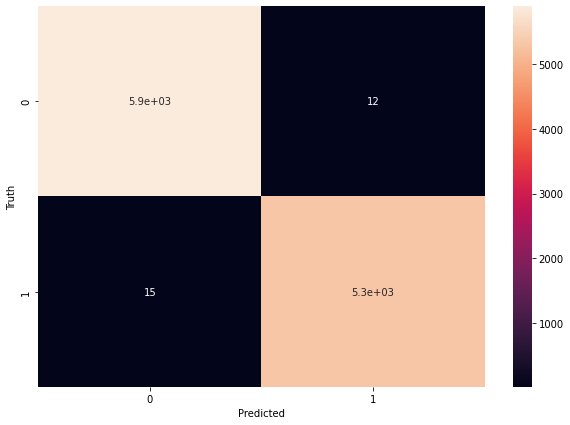

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Bidirectional LSTM

In [ ]:
#Defining Neural Network
model_b = Sequential()
#Non-trainable embeddidng layer
model_b.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#Bidirectional LSTM 
model_b.add(Bidirectional(LSTM(128)))

model_b.add(Dense(1, activation='sigmoid'))
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model_b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          10566600  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 10,801,353
Trainable params: 234,753
Non-trainable params: 10,566,600
_________________________________________________________________


In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model_b.fit(X_train, y_train, validation_split=0.3, epochs=5)

Epoch 1/5
737/737 [==============================] - 1387s 2s/step - loss: 0.1209 - acc: 0.9573 - val_loss: 0.0840 - val_acc: 0.9738
Epoch 2/5
737/737 [==============================] - 1378s 2s/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0194 - val_acc: 0.9949
Epoch 3/5
737/737 [==============================] - 1361s 2s/step - loss: 0.0139 - acc: 0.9962 - val_loss: 0.0117 - val_acc: 0.9971
Epoch 4/5
737/737 [==============================] - 1378s 2s/step - loss: 0.0083 - acc: 0.9976 - val_loss: 0.0081 - val_acc: 0.9980
Epoch 5/5
737/737 [==============================] - 1332s 2s/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0081 - val_acc: 0.9979


In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model_b.predict(X_test) >= 0.5).astype("int")

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model_b.save('model_blstm.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[5797,    6],
       [  16, 5406]])

Text(69.0, 0.5, 'Truth')

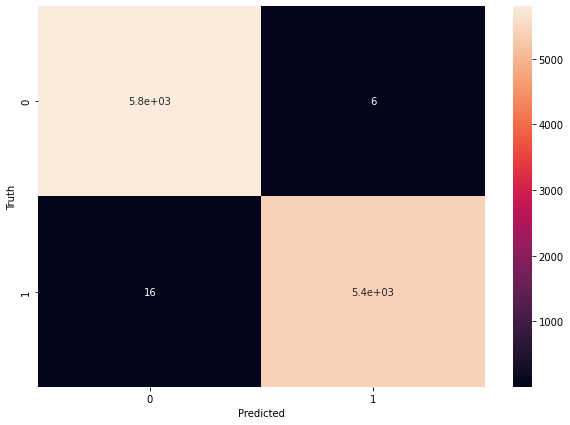

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')